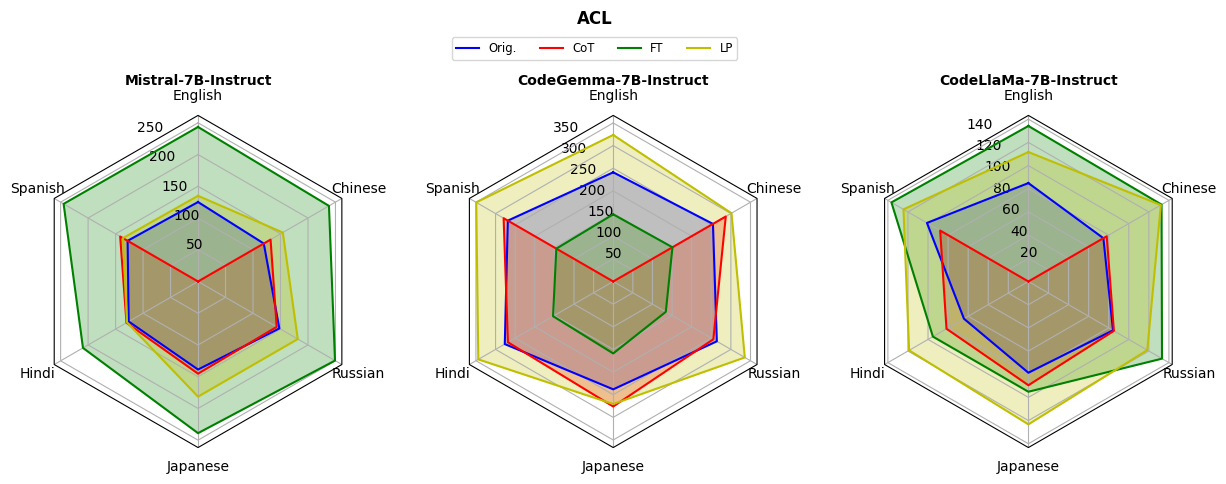

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections import register_projection
from matplotlib.projections.polar import PolarAxes
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` Axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding Axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


def example_data():
    data = [
        ['English', 'Spanish', 'Hindi', 'Japanese', 'Russian', 'Chinese'],
        {
            'Orig.': [
                [125.16, 128.13, 126.12, 138.72, 147.92, 119.62],
                [241.07, 268.72, 276.45, 238.18, 264.22, 254.28],
                [84.9, 101.07, 64.23, 78.74, 84.31, 74.71]
            ],
            'CoT': [
                [0.0, 141.64, 130.13, 145.27, 143.08, 131.94],
                [0.0, 279.41, 268.51, 276.09, 255.31, 286.98],
                [0.0, 87.9, 81.6, 89.52, 85.19, 78.03]
            ],
            'FT': [
                [243.44, 244.54, 209.33, 238.97, 249.18, 238.18],
                [148.27, 145.06, 153.38, 158.91, 134.11, 151.05],
                [134.18, 136.47, 95.14, 95.14, 133.14, 132.69]
            ],
            'LP': [
                [134.91, 136.66, 129.18, 181.45, 181.45, 154.24],
                [323.53, 349.24, 344.02, 270.59, 335.52, 301.57],
                [111.67, 124.46, 118.85, 123.29, 118.45, 131.94]
            ]
        }
    ]
    return data


if __name__ == '__main__':
    N = 6  # Number of factors/languages
    theta = radar_factory(N, frame='polygon')

    data = example_data()
    spoke_labels = data[0]
    model_data = data[1]

    fig, axs = plt.subplots(figsize=(15, 5), nrows=1, ncols=3,
                            subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    # Define the colors representing different approaches
    colors = ['b', 'r', 'g', 'y']
    labels = ['Orig.', 'CoT', 'FT', 'LP']

    # Models to plot
    models = ['Mistral-7B-Instruct', 'CodeGemma-7B-Instruct', 'CodeLlaMa-7B-Instruct']

    # Iterate through each model and plot the corresponding data
    for ax, model in zip(axs.flat, range(len(models))):
        ax.set_title(models[model], weight='bold', size='medium', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')

        for approach, color in zip(labels, colors):
            d = model_data[approach][model]  # Select the data for the specific model
            ax.plot(theta, d, color=color, label=approach)
            ax.fill(theta, d, facecolor=color, alpha=0.25)

        ax.set_varlabels(spoke_labels)

    # Collect handles and labels from one of the axes
    handles, labels = axs[0].get_legend_handles_labels()

    # Add legend relative to the center plot
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.95),
               labelspacing=0.1, fontsize='small', ncol=4)

    fig.text(0.5, 0.965, 'ACL',
             horizontalalignment='center', color='black', weight='bold',
             size='large')

    plt.show()


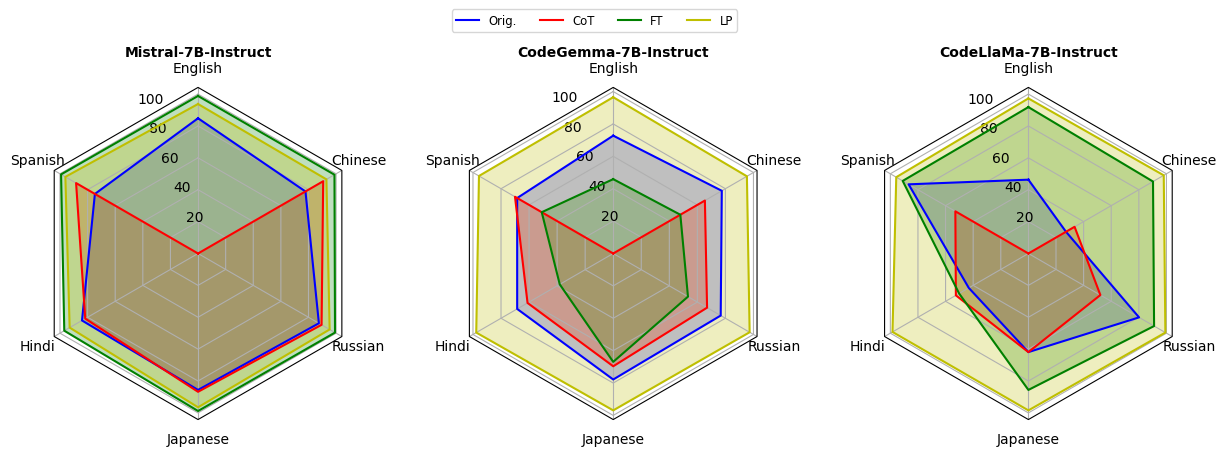

In [7]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections import register_projection
from matplotlib.projections.polar import PolarAxes
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` Axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding Axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


def example_data():
    data = [
        ['English', 'Spanish', 'Hindi', 'Japanese', 'Russian', 'Chinese'],
        {
            'Orig.': [
                [84.82, 74.71, 84.05, 85.6, 87.55, 77.82],
                [72.76, 68.48, 68.48, 77.82, 76.65, 77.43],
                [46.3, 86.77, 43.19, 61.87, 80.16, 27.24]
            ],
            'CoT': [
                [0.0, 88.33, 81.71, 86.77, 89.49, 90.66],
                [0.0, 70.04, 61.09, 69.65, 66.93, 65.37],
                [0.0, 52.92, 52.53, 61.87, 52.14, 33.46]
            ],
            'FT': [
                [98.83, 99.22, 96.89, 98.83, 99.22, 98.83],
                [45.91, 50.97, 38.13, 66.93, 53.31, 47.86],
                [91.83, 91.05, 50.19, 85.6, 91.05, 90.27]
            ],
            'LP': [
                [93.77, 96.11, 93.0, 96.5, 95.33, 93.0],
                [96.5, 95.72, 97.67, 96.89, 97.28, 95.33],
                [97.28, 95.72, 98.44, 98.44, 99.22, 98.05]
            ]
        }
    ]
    return data


if __name__ == '__main__':
    N = 6  # Number of factors/languages
    theta = radar_factory(N, frame='polygon')

    data = example_data()
    spoke_labels = data[0]
    model_data = data[1]

    fig, axs = plt.subplots(figsize=(15, 5), nrows=1, ncols=3,
                            subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    # Define the colors representing different approaches
    colors = ['b', 'r', 'g', 'y']
    labels = ['Orig.', 'CoT', 'FT', 'LP']

    # Models to plot
    models = ['Mistral-7B-Instruct', 'CodeGemma-7B-Instruct', 'CodeLlaMa-7B-Instruct']

    # Iterate through each model and plot the corresponding data
    for ax, model in zip(axs.flat, range(len(models))):
        ax.set_title(models[model], weight='bold', size='medium', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')

        for approach, color in zip(labels, colors):
            d = model_data[approach][model]  # Select the data for the specific model
            ax.plot(theta, d, color=color, label=approach)
            ax.fill(theta, d, facecolor=color, alpha=0.25)

        ax.set_varlabels(spoke_labels)

    # Collect handles and labels from one of the axes
    handles, labels = axs[0].get_legend_handles_labels()

    # Add legend relative to the center plot
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.95),
               labelspacing=0.1, fontsize='small', ncol=4)

    # fig.text(0.5, 0.965, 'CCR',
    #          horizontalalignment='center', color='black', weight='bold',
    #          size='large')

    plt.show()
